# Analysis of Automobile dataset

In [8]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
from word2number import w2n

auto = pd.read_table('automobile.txt',delimiter=',')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Presented is the raw data extracted from the automobile text file. The initial look at the data seems to show a complete set with 'normalized_losses' presenting the only issue initially. Before any analysis, missing and incomplete information will be identified and dealt with appropriately. The set seems to use '?' for missing values so we will replace these with NaN

# Data Cleansing

In [9]:
auto.replace('?',np.NaN, inplace = True)
auto.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
# get the number of missing data points per column
missing_values_count = auto.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As the incomplete values for 'normalized_losses' represent around 23% of the column, the column will be dropped from the set

In [9]:
# drop normalized loss column
auto.drop(columns=['normalized-losses'], inplace = True)
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The remaining missing data make up 1% of the fields. However inputting statistical measures may skew data as the cars are uniqualy identified by make as well as body-style. Therefore we will drop these columns as well

In [11]:
# drop rows with null values
auto.dropna(inplace=True)

In [12]:
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Some of the numerical data is represented as an object and must be changed to either an integer or float

In [13]:
# change data type of columns from object to float and integer
change_cols=['horsepower', 'peak-rpm', 'price']
change_cols2=['bore','stroke']

auto[change_cols]=auto[change_cols].applymap(np.int64)
auto[change_cols2]=auto[change_cols2].applymap(np.float64)

auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

## Data Overview

We now will look at an overview of our data to facilatate the analysis we would like to conduct.

In [14]:
# describe numerical data of the set

auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [15]:
# describe categorical data of the set

auto.describe(include=[np.object])

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,159,159,159,159,159,159,159,159,159,159,159
unique,51,18,2,2,2,5,3,1,5,5,6
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,11,31,144,132,95,79,105,159,123,136,64


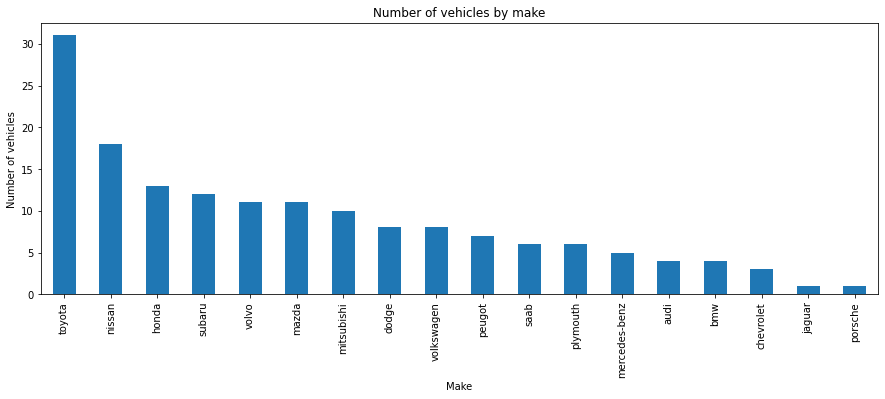

In [16]:
# plot bar chart of vehicles by make

auto['make'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');


The most popular brand is toyota and the next three brands are also Japanese-based which hints at a certain trend in consumer behaviour. However what is also important to note are the five brands on the the end of the scale as they are considered as more luxury vehicles which should reflect later in their price.

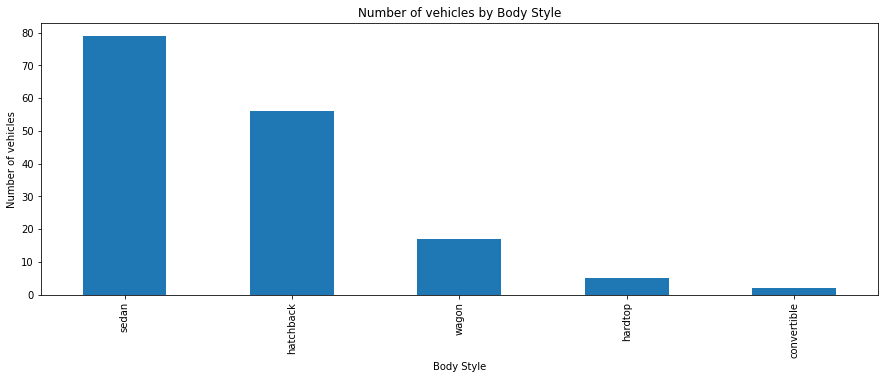

In [17]:
# plot bar chart of vehicles by body-style

auto['body-style'].value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by Body Style")
plt.ylabel('Number of vehicles')
plt.xlabel('Body Style');

The most popular style is a sedan followed by a hatchback. Both cars are suited to all purpose functionality while the remaining three have specific functions and are less frequently chosen

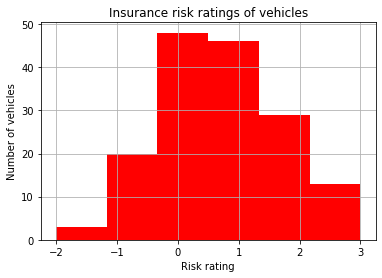

In [18]:
# plot histogram of vehicles insurance rating

auto['symboling'].hist(bins=6,color='red');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');

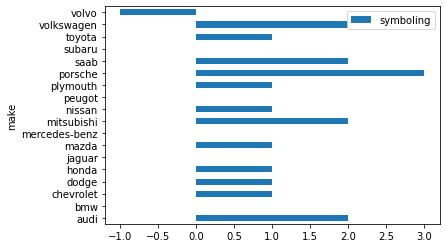

In [19]:
group_by_make = auto.groupby(by=['make'])

car_data_avg = round(group_by_make.mean(),0)
car_data_avg

# Since all the columns in car_data_count are the same, we will use just the first column as the rest yield the same result. iloc allows us to take all the rows and the zeroth column.

car_data_count_series = car_data_avg.iloc[5:5,1]


# Assemble a DataFrame of only the relevant features to plot  
features_of_interest = pd.DataFrame({'symboling': car_data_avg['symboling']})

#Horizontal bar chart of symboling per make
features_of_interest = features_of_interest.iloc[:20,]
features_of_interest.plot.barh()

Risk rating is evenly distributed amongst the cars. Looking at the specific values makes it appears volvo is seen as the safest pick as it returns a score of -1. Porsche is seen as the riskiest car and is likely to incur higher insurance premiums

## Price Analysis

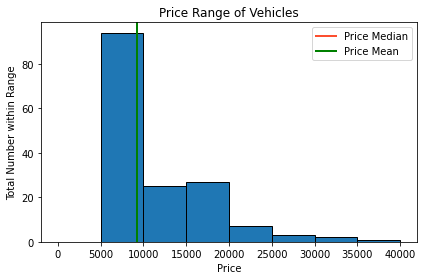

In [20]:
# histogram with median line
ave_price = auto['price']

bins = [0,5000,10000,15000,20000,25000,30000,35000,40000]

plt.hist(ave_price, bins=bins, edgecolor='black')

median_price = auto['price'].median()
color = '#fc4f30'
mean_price = auto['price'].mean()
plt.axvline(median_price, color=color, label='Price Median', linewidth=2)
plt.axvline(median_price, color='green', label='Price Mean', linewidth=2)

plt.legend()

plt.title('Price Range of Vehicles')
plt.xlabel('Price')
plt.ylabel('Total Number within Range')

plt.tight_layout()

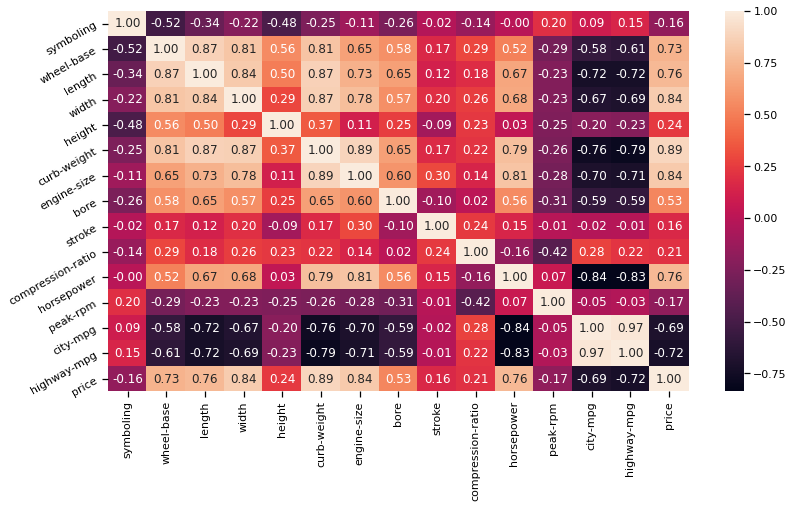

In [75]:
# heat map to compare correlation bewteen variables

corr = auto.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Findings: There are some good inferences we can take it from the correlation heat map.

Price is more correlated with engine size and curb weight of the car
Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car
Wheel base is highly correlated with length and width of the car

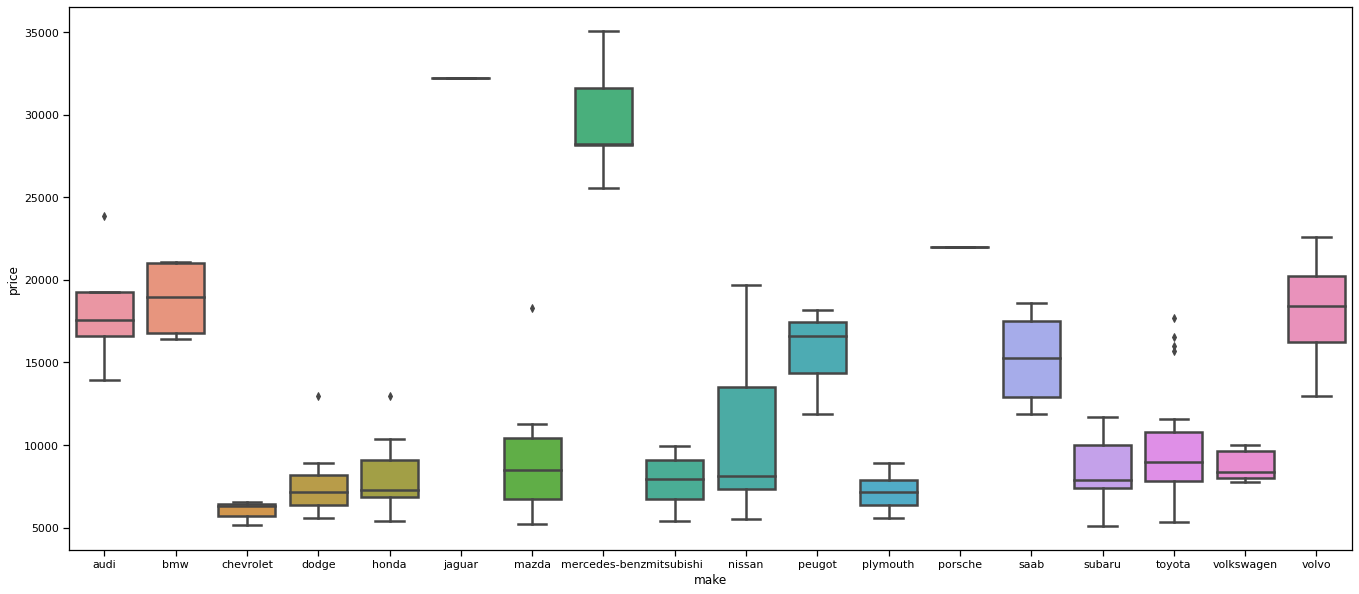

In [58]:
# box plot of price per make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=auto)



The price distribution is quite heavily influenced by the presence of the luxury brands mentioned before but the histogram shows they make up a small % of the dataset. The table below confirms this as the brands located in this category are made up of Audi, Bmw, Porshe, Volvo and Mercedes-Benz.

In [21]:
# return cars over 20000 in price
auto[auto['price'] > 20000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
69,0,93,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018


## Analysis on 4 most popular car-makes

As identified earlier the data presents a good opportunity to take a closer look at 4 direct competitiors in the market; toyota, nissan, honda and subaru.

In [23]:
# create group of cars 
jpcar = ['toyota','nissan','honda','subaru']

# create dataframe with group included
jp_df = auto[auto.isin(jpcar).any(axis=1)]

group_by_car = jp_df.groupby(by=['make','body-style'])

car_data_avg = round(group_by_car.mean(),0)
car_data_avg

symboling  wheel-base  length  width  height  curb-weight  \
make   body-style                                                               
honda  hatchback          1.0        92.0   153.0   64.0    52.0       1970.0   
       sedan              0.0        96.0   172.0   65.0    54.0       2289.0   
       wagon              0.0        96.0   157.0   64.0    58.0       2024.0   
nissan hardtop            2.0        95.0   162.0   64.0    53.0       2008.0   
       hatchback          2.0        95.0   172.0   67.0    51.0       2740.0   
       sedan              1.0        96.0   170.0   65.0    55.0       2238.0   
       wagon              1.0        96.0   175.0   65.0    54.0       2452.0   
subaru hatchback          2.0        94.0   157.0   64.0    54.0       2137.0   
       sedan              0.0        97.0   172.0   65.0    53.0       2314.0   
       wagon              0.0        97.0   174.0   65.0    54.0       2454.0   
toyota convertible        2.0        98.0   176.0   66.0    53.0       2975.0   
       hardtop            2.0        98.0   176.0   66.0    52.0       2585.0   
       hatchback          1.0        98.0   170.0   65.0    53.0       2370.0   
       sedan             -0.0        98.0   172.0   65.0    54.0       2338.0   
       wagon              0.0        96.0   170.0   64.0    59.0       2560.0   

                    engine-size  bore  stroke  compression-ratio  horsepower  \
make   body-style                                                              
honda  hatchback           95.0   3.0     3.0                9.0        74.0   
       sedan              106.0   3.0     4.0                9.0        90.0   
       wagon               92.0   3.0     3.0                9.0        76.0   
nissan hardtop             97.0   3.0     3.0                9.0        69.0   
       hatchback          152.0   3.0     3.0                9.0       137.0   
       sedan              119.0   3.0     3.0               11.0        89.0   
       wagon              125.0   3.0     3.0                9.0        97.0   
subaru hatchback          104.0   4.0     3.0                9.0        72.0   
       sedan              108.0   4.0     3.0                9.0        90.0   
       wagon              108.0   4.0     3.0                9.0        92.0   
toyota convertible        146.0   4.0     4.0                9.0       116.0   
       hardtop            146.0   4.0     4.0                9.0       116.0   
       hatchback          118.0   3.0     3.0               10.0        93.0   
       sedan              112.0   3.0     3.0               12.0        86.0   
       wagon               92.0   3.0     3.0                9.0        62.0   

                    peak-rpm  city-mpg  highway-mpg    price  
make   body-style                                             
honda  hatchback      5700.0      33.0         38.0   7054.0  
       sedan          5780.0      27.0         32.0   9945.0  
       wagon          6000.0      30.0         34.0   7295.0  
nissan hardtop        5200.0      31.0         37.0   8249.0  
       hatchback      5200.0      23.0         29.0  14409.0  
       sedan          5156.0      29.0         35.0   8605.0  
       wagon          5200.0      26.0         32.0   9916.0  
subaru hatchback      4567.0      28.0         33.0   6591.0  
       sedan          4800.0      27.0         31.0   9071.0  
       wagon          4900.0      25.0         29.0   9342.0  
toyota convertible    4800.0      24.0         30.0  17669.0  
       hardtop        4800.0      24.0         30.0   9762.0  
       hatchback      4879.0      28.0         33.0   9616.0  
       sedan          4840.0      29.0         34.0   9542.0  
       wagon          4800.0      28.0         34.0   7865.0

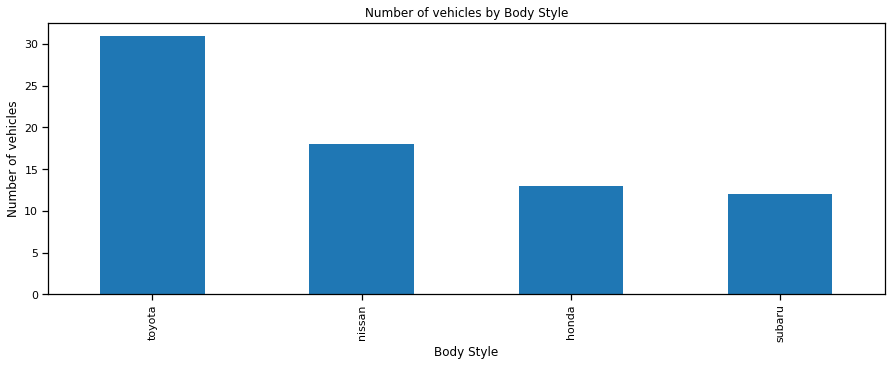

In [24]:
# bar chart for count of cars per make

jp_df['make'].value_counts().plot(kind='bar', figsize=(15,5))

plt.title("Number of vehicles by Body Style")
plt.ylabel('Number of vehicles')
plt.xlabel('Body Style');

Text(0.5, 1.0, 'Number of vehicles by Body Style')

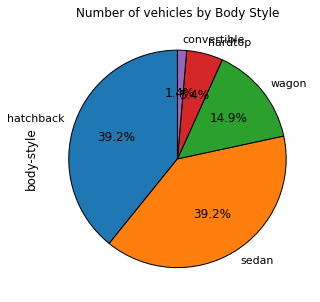

In [34]:
# pie chart with % of body-style
jp_df['body-style'].value_counts().plot(kind='pie', figsize=(15,5), startangle=90,
        autopct="%1.1f%%", wedgeprops={'edgecolor':'black'})

plt.title("Number of vehicles by Body Style")


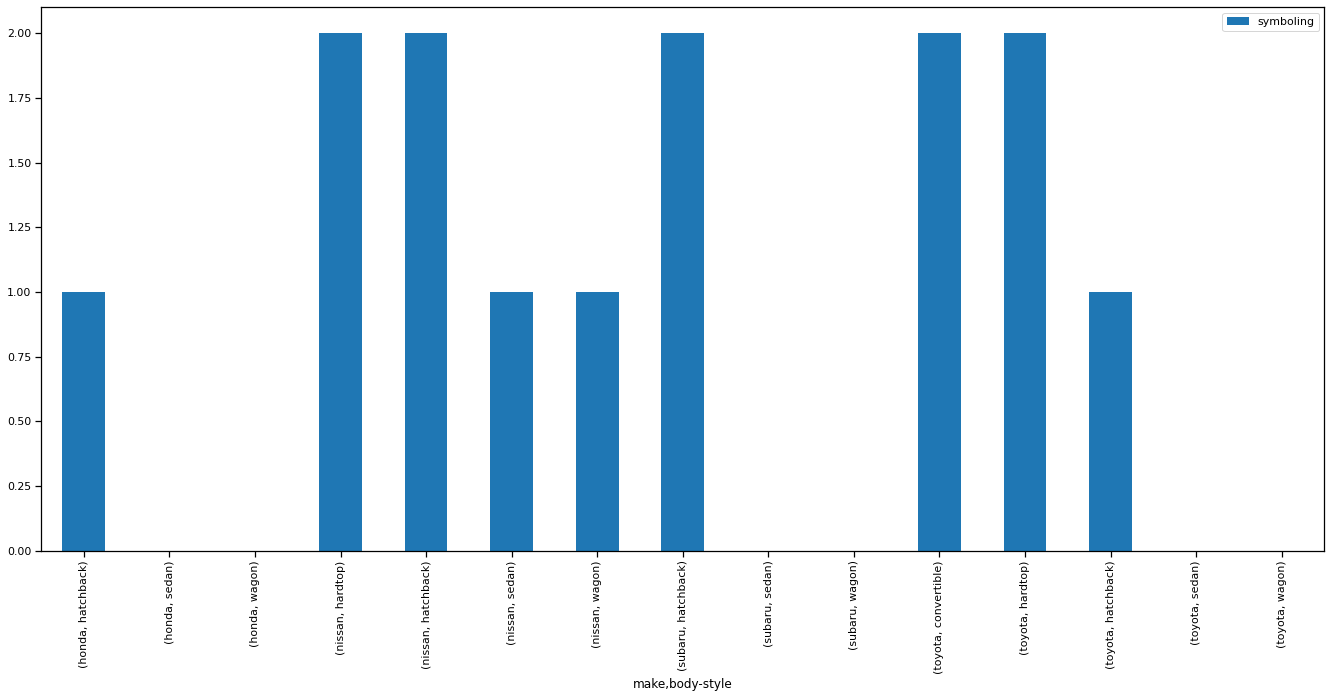

In [73]:
group_by_jpmake = jp_df.groupby(by=['make','body-style'])

jp_df_avg = round(group_by_jpmake.mean(),0)
jp_df_avg
color = jp_df.groupby(by=['body-style'])

# Since all the columns in car_data_count are the same, 
# we will use just the first column as the rest yield the same result. 
car_data_count = jp_df_avg.iloc[5:5,1]

# DataFrame of only the relevant features to plot  
feat_of_interest = pd.DataFrame({'symboling': jp_df_avg['symboling']})

# bar chart plottong count per make and body-style
feat_of_interest.plot.bar()

The symbolling shows a pattern within the type of car. Sedans of 3 brands are 0 rated while hatchbacks score a minimum of 1.

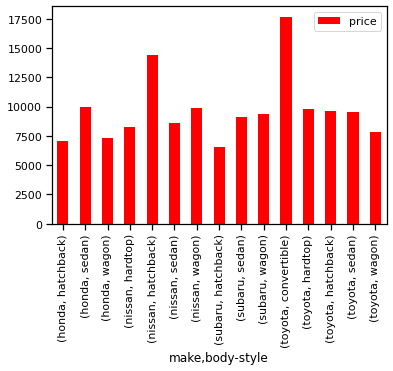

In [50]:
feat_of_interest = pd.DataFrame({'price': jp_df_avg['price']})


feat_of_interest.plot.bar(color= 'red')

The price range is reflected in the various body styles. Honda and subaru represent the cheaper options while nissan and toyota (the two most popular choices) are more costly. Particularly interesting is the price of the nissan hatchback compared to the rest of the market. Compared to the toyota it comes in around a 50% price increase

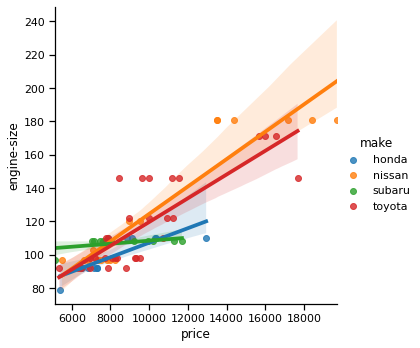

In [68]:
g = sns.lmplot('price',"engine-size",jp_df, hue="make");

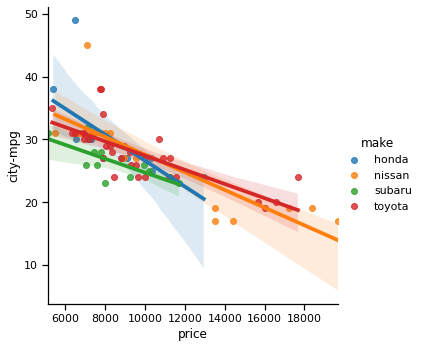

In [69]:
g = sns.lmplot('price',"city-mpg", jp_df, hue="make");

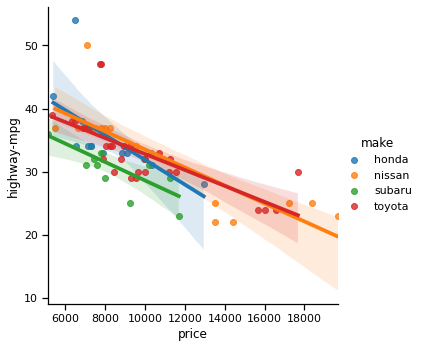

In [70]:
g = sns.lmplot('price',"highway-mpg", jp_df, hue="make");

The three scatter plots compare price to features of the car. Engine size as well as Miles per gallon in the city and highway. The three features are tied to efficient performance of the car. As engine size increases, price rises substantially in both toyota and nissan. This correlates to use of fuel which is inversely related to the engine relationship. As the size increases the larger engine starts to consume more fuel at a less efficient rate. This is further enhanced by the two following scatter plots which show the relationship between weight of the car towards miles per gallon 

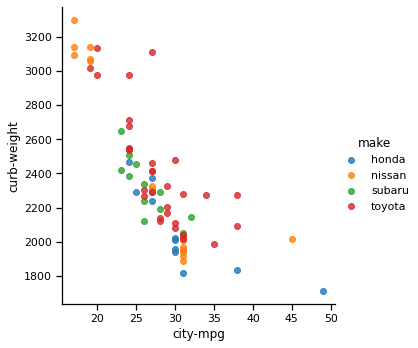

In [61]:
g = sns.lmplot('city-mpg',"curb-weight", jp_df, hue="make", fit_reg=False);


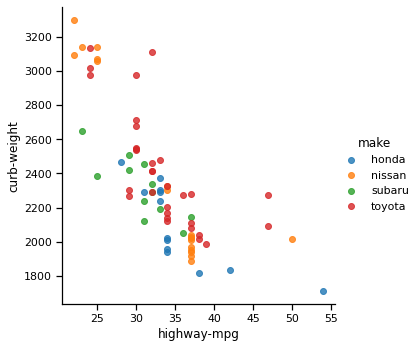

In [63]:
f = sns.lmplot('highway-mpg',"curb-weight", jp_df, hue="make",fit_reg=False);

## Findings

How the data set are distributed and correlation between different fields and how they are related, the symbolling shows cars are initially assigned a risk factor symbol associated with its price. Within the four brands chosen what can be seen is that Toyota presents the most cost-effective option taking all factors into account. Although more expensive than Honda and Subaru, the car provides better performance with miles per gallon, an equal risk rating and more enhanced specifications of the car. Nissan seems overpriced based on its competitors as it provides worse performance in many categories compared to the other three brands at a higher price.